In [36]:
import numpy as np
import pandas as pd
import networkx as nx
import shapefile as shp

import matplotlib.style
matplotlib.style.use('classic')
from matplotlib import pyplot as plt

In [4]:
K = np.loadtxt( 'params_COL/K_Colombia_pu.txt' )
P = np.loadtxt( 'params_COL/P_Colombia_pu.txt' )
positions = np.loadtxt( 'params_COL/Node_Location.txt' )

In [5]:
data = pd.read_excel('params_COL/ESTACIONES-EN-COLOMBIA (1).xlsx')

In [8]:
P[67] = 2.0

In [16]:
tobe_consumed = np.sum(P[P>0])/np.sum(P<=0)

In [18]:
P[P<=0] = -tobe_consumed

In [26]:
np.sum(P)

4.218847493575595e-15

In [25]:
np.sum(data['TIPO ESTACION'] == 'H') + np.sum(data['TIPO ESTACION'] == 'T')

28

In [41]:
np.savetxt('params_COL/P_Colombia_pu.txt', P)

In [27]:
color_nodes = np.array( ['gold' for i in range(len(P))], dtype=object )

In [28]:
color_nodes[data['TIPO ESTACION'] == 'H'] = 'deepskyblue'
color_nodes[data['TIPO ESTACION'] == 'T'] = 'crimson'

In [29]:
legend_nodes = np.array( ['Consumer' for i in range(len(P))], dtype=object )
legend_nodes[data['TIPO ESTACION'] == 'H'] = 'Hydroelectric power station'
legend_nodes[data['TIPO ESTACION'] == 'T'] = 'Thermal power station'

In [30]:
G = nx.from_numpy_matrix(K)

In [31]:
sf = shp.Reader("params_COL/COL_adm/COL_adm1.shp")

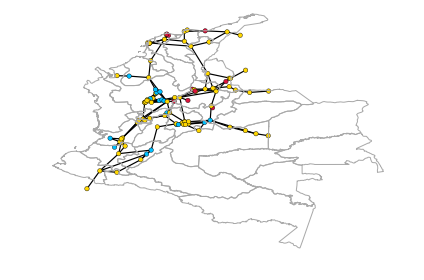

In [47]:
plt.figure()
for shape in sf.shapeRecords():
    for i in range(len(shape.shape.parts)):
        i_start = shape.shape.parts[i]
        if i==len(shape.shape.parts)-1:
            i_end = len(shape.shape.points)
        else:
            i_end = shape.shape.parts[i+1]
        x = [i[0] for i in shape.shape.points[i_start:i_end]]
        y = [i[1] for i in shape.shape.points[i_start:i_end]]
        plt.plot(x,y, color = 'darkgrey')

nx.draw( G, pos = positions, node_size = 20, node_color = color_nodes, \
        linewidths = 0.4, width = 1.2)#, labels = label_node, font_size = 4 )
#plt.axis('on')
plt.xlim([-80, -66])
plt.ylim([-5, 13])
plt.tight_layout()
plt.savefig('Images_2/colombian_graph.pdf')
plt.show()

In [48]:
label_node = dict()
for keyv in np.arange(0, 102, 1):
    label_node[keyv] = keyv

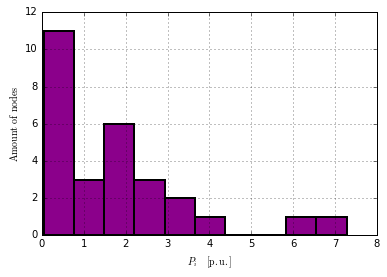

In [49]:
P_gens = P[P>0]
plt.figure()
plt.hist(P_gens, bins = 10, color = 'darkmagenta', linewidth = 2, alpha = 1)
plt.grid()
plt.xlabel(r'$P_i$'  + '   ' + r'$\rm{[p.u.]}$')
plt.ylabel(r'$\rm{Amount}$' + ' ' + r'$\rm{of}$' + ' ' + r'$\rm{nodes}$')
plt.savefig('Images_2/Hist_col_P.pdf')
plt.show()

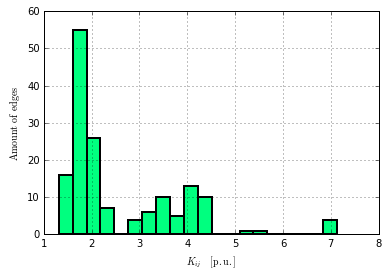

In [50]:
K2 = K[np.triu_indices(102)]

K2 = K2[K2 > 0]

plt.figure()
plt.hist(K2, bins = 20, color = 'springgreen', linewidth = 2, alpha = 1)
plt.grid()
plt.xlabel(r'$K_{ij}$'  + '   ' + r'$\rm{[p.u.]}$')
plt.ylabel(r'$\rm{Amount}$' + ' ' + r'$\rm{of}$' + ' ' + r'$\rm{edges}$')
plt.savefig('Images_2/Hist_col_K.pdf')
#plt.yscale('log')
plt.show()

In [51]:
K[np.triu_indices(102)].shape

(5253,)

In [52]:
np.sum(P)

4.218847493575595e-15

In [53]:
np.sum(P[P < 0] != P.min())

0